# X-Files Transcript Analysis

I'm a big X-Files fan and thought it would be fun to analyse the script over the course of the original tv series.

The script I used to scrape the transcript from the web can be found in this repository: 
```
    XFiles_Scrape.py
```
Many thanks to the people who wrote up the transcripts and made tham available at: http://www.insidethex.co.uk/

## Imports

First need to import packages required for the analysis

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

Next step is to load the datasets into pandas DataFrames

In [2]:
dir_path = pathlib.Path().absolute()

episodes_df = pd.read_csv(dir_path / 'X_Files_Episodes.csv')
scenes_df = pd.read_csv(dir_path / 'X_Files_Scenes.csv')
lines_df = pd.read_csv(dir_path / 'X_Files_Lines.csv')

## Datasets

There are three datasets here:  
1. Episodes  
2. Scenes  
3. Lines  

Each Episode typically has many Scenes, and each Scene can have many spoken Lines.

Episodes <--(1:\*)--> Scenes <--(1:\*)--> Lines

In [3]:
episodes_df.head()

,Episode Name,Episode Number,Episode Type,Date Aired,Transcript URL
0,PILOT,1X79,Mythos,1993/09/10,transcrp/scrp179.htm
1,DEEP THROAT,1X01,Mythos,1993/09/17,transcrp/scrp101.htm
2,SQUEEZE,1X02,MOTW,1993/09/24,transcrp/scrp102.htm
3,CONDUIT,1X03,Mythos,1993/10/01,transcrp/scrp103.htm
4,THE JERSEY DEVIL,1X04,MOTW,1993/10/08,transcrp/scrp104.htm


In [4]:
scenes_df.head()

,Episode Number,Scene Number,Scene Description
0,1X79,Scene 1,"COLLUM NATIONAL FOREST, NORTHWEST OREGON"
1,1X79,Scene 2,"FBI HEADQUARTERS; WASHINGTON, D.C."
2,1X79,Scene 3,AIRPLANE TO OREGON
3,1X79,Scene 4,"BELLEFLEUR, OREGON"
4,1X79,Scene 5,"COASTAL NORTHWEST OREGON; MARCH 7, 1992"


In [5]:
lines_df.head()

,Episode Number,Scene Number,Line Type,Character Name,Script
0,1X79,Scene 1,Context,NaN,"(A woman runs through the forest, grunting as ..."
1,1X79,Scene 1,Line,JOHN TRUITT,I put the time of death between eight and twel...
2,1X79,Scene 1,Context,NaN,(He pulls up the back of her nightgown to reve...
3,1X79,Scene 1,Line,MILES,Can we turn her over?
4,1X79,Scene 1,Context,NaN,(They do so. Miles stands.)


# Transformations

The Lines dataframe contains line types = 'Context' which are not spoken words but explanations of what is happening on screen.  
For the purpose of this analysis, we just want to look at the words spoken by the characters.  

Filter for Line Type = 'Line'

In [13]:
# Filter for spoken lines only
lines_df = lines_df[lines_df['Line Type'] == 'Line']

# Extract the Season Number
lines_df['Season'] = lines_df['Episode Number'].str[0]

# Grouping

# Season Linecounts
s_grouped = lines_df.groupby('Season').size().reset_index(name='Count')

# Season Linecounts per Character
sc_grouped = lines_df.groupby(['Season', 'Character Name']).size().reset_index(name='Count')

# Season Linecounts for Mulder
s_mulder = sc_grouped.loc[sc_grouped['Character Name'].isin(['MULDER'])]

# Season Linecounts for Scully
s_scully = sc_grouped.loc[sc_grouped['Character Name'].isin(['SCULLY'])]

# Season Linecounts for Skinner
s_skinner = sc_grouped.loc[sc_grouped['Character Name'].isin(['SKINNER'])]

# Season Linecounts for Doggett
s_doggett = sc_grouped.loc[sc_grouped['Character Name'].isin(['DOGGETT'])]


,Season,Count
0,1,7118
1,2,6940
2,3,7801
3,4,6982
4,5,6159


# Visualisations

Let's see what the data is saying...

<Figure size 432x288 with 0 Axes>

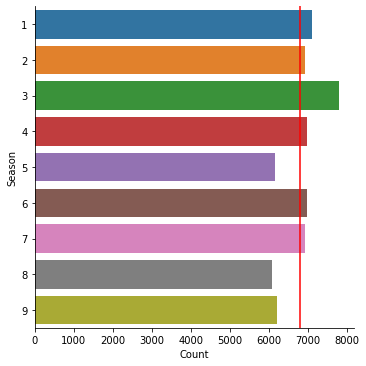

Average lines per Season: 6796.8


In [23]:
# Calculate the average lines per season
c_sum = s_grouped['Count'].sum()
c_count = s_grouped['Season'].count()
c_avg = c_sum / c_count

# Plot the chart
plt.clf()
sns.catplot(y='Season', x='Count' ,kind='bar', data=s_grouped)
plt.axvline(x=c_avg, color='red')
plt.show()

print("Average lines per Season: " + str(round(c_avg,1)))

## Top 5 Characters by Lines

Which characters had the most amount of lines throughout the series

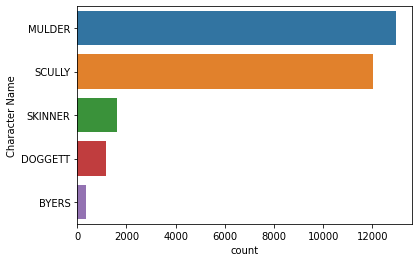

In [7]:
plt.clf()
sns.countplot(y='Character Name', data=lines_df, order=lines_df['Character Name'].value_counts().iloc[:5].index)
plt.show()

As expected, the two stars of the show (Mulder and Scully) vastly lead the way in terms of volume of dialogue.

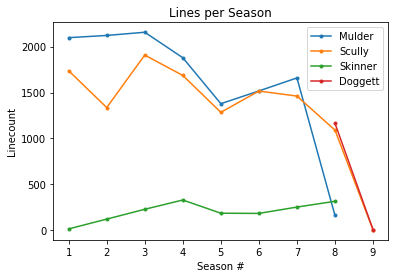

In [8]:
plt.clf()

plt.plot(sc_grouped_m['Season'], sc_grouped_m['Count'], label='Mulder', marker='.')
plt.plot(sc_grouped_s['Season'], sc_grouped_s['Count'], label='Scully', marker='.')
plt.plot(sc_grouped_sk['Season'], sc_grouped_sk['Count'], label='Skinner', marker='.')
plt.plot(sc_grouped_dg['Season'], sc_grouped_dg['Count'], label='Doggett', marker='.')
plt.xlabel('Season #')
plt.ylabel('Linecount')
plt.title('Lines per Season')
plt.legend()

plt.show()


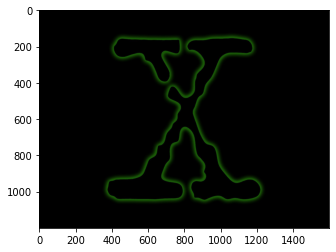

In [18]:
plt.clf()
img = plt.imread(dir_path / 'images/x_files_logo_001.jpg')
fig, ax = plt.subplots()
ax.imshow(img)